Anggota Kelompok :  Muhamad Ardhi                 (1301160786),
                    Muhammad Fikri Septiawan      (1301160789),
                    Elizabeth Ramah Sari Manurung (1301164710)

**Metode dan Analisis Kinerja Sistem Unsupervised Learning**

**Metode**
- Menggunakan metode K-means,
- Menggunakan library Pandas untuk kebutuhan data frame atau tabel agar data dapat disajikan dengan rapi,
- Menggunakan library Numpy untuk kebutuhan operasi perhitungan seperti mencari standar deviasi, euclidean distance, dan lain-lain,
- Menggunakan library matplotlib dan seaborn untuk kebutuhan plot atau visualisasi data clustering,
- Menggunakan library google colab untuk mendapatkan file dengan mendownload terlebih dahulu,
- Menggunakan silhouette score untuk mengukur akurasi clustering dengan *metric* euclidean distance.











**Analisis Kinerja Sistem**



1.   *Preprocessing Data* : 

      *   Menentukan korelasi (kedekatan tiap fitur) dan didapat nilai korelasi rata-rata > 3,2 dianggap merupakan fitur yang berpengaruh dalam *clustering* (Kodingan Baris ke 4),
      *   Membuang (drop) fitur yang memiliki nilai korelasi rata-rata < 3,2 seperti *id, date, zipcode, long, lat, sqft_lot, condition, yr_built, sqft_lot15, yr_renovated* (Kodingan Baris ke 5),
      *   Mengisi nilai fitur (dengan nilai rata-rata karena data bertipe *numerical*) yang *missing value* yaitu pada fitur *sqft_living15* row ke 3164 (Kodingan Baris ke 7),
      *   Mengubah data dari *dataframe* ke bentuk *array* agar dapat dilakukan operasi perhitungan (Kodingan Baris ke 8).


 *Metode K-Means*
2.   Menentukan nilai k (jumlah *cluster*) terlebih dahulu (Kodingan Baris ke 9)
, disini kelompok kami memilih jumlah *cluster* = 2 dikarenakan jumlah *cluster* yang optimal (memiliki akurasi terbesar diantara jumlah *cluster* lainnya) dengan menggunakan metode *elbow* dipercobaan lain.

3. Pemilihan *centroid* (pusat *cluster*) awal secara random, kelompok kami memilih *centroid* dengan cara random dikali dengan standar deviasi (setiap fitur) + *mean* (nilai rata-rata setiap fitur) (Kodingan Baris ke 9), karena dengan metode dikali standar deviasi + mean akan mendapatkan *centroid* yang pas dengan distribusi data. *Centroid* awal divisualisasikan pada Kodingan Baris ke 9.

4. Menghitung nilai *euclidean distance* dari setiap *row* data terhadap *centroid* awal (ada 2 *centroid*) yang telah ditentukan pada nomor 2 (Kodingan Baris ke 11).

5. Mengecek kedekatan dari setiap *row * data terhadap *centroid* awal dengan cara memilih nilai minimum diantara hasil perhitungan nilai *euclidean distance* ke 2 *centroid*, lalu memasukan *row* data ke dalam *cluster* sesuai nilai yang minimum (Kodingan Baris ke 11).

6. Mengupdate nilai *centroid* dengan menghitung nilai rata-rata setiap *value* fitur dari data yang telah dimasukkan ke dalam *cluster* sementara (Kodingan Baris ke 11). *Centroid* baru divisualisasikan pada Kodingan Baris ke 12.

7. Lakukan kembali (menggunakan *for*) nomor 4,5,6 sampai nilai *euclidean distance* = 0 dalam artian setiap *row* data tidak berubah nilai *cluster*nya (Kodingan Baris ke 12).

8. Menemukan hasil *cluster* tetapi masih dalam bentuk array (Kodingan Baris ke 13), kemudian agar terlihat rapi, maka hasil *cluster* digabung dengan dataset setelah di *preprocessing* data (Kodingan Baris ke 14,15,17,18). Dan bisa juga di*download* hasil *cluster*nya dalam bentuk csv dengan memanfaatkan library google colab (Kodingan Baris ke 16).

9. Mencari nilai korelasi hasil *clustering *untuk mengetahui fitur-fitur yang berpengaruh terhadap hasil *cluster*, didapatkan nilai korelasi terbesar yaitu *price* dan *sqft_living* lalu divisualiasikan secara dua dimensi (Kodingan baris ke 33,34,35).

10. Visualisasi 3 dimensi terhadap fitur *price, sqft_living, sqft_above* (Kodingan Baris ke 36).

11. Visualisasi 3 dimensi terhadap fitur *price, sqft_living, grade* (Kodingan Baris ke 37).

12. Menghitung ketepatan hasil *cluster* dengan *silhouette score* dengan *metric euclidean* terhadap hasil *clustering* dan menghasilkan nilai terbaik yaitu 68,14% (Kodingan Baris ke 38).

13. Urutan fitur yang berpengaruh terhadap *clustering* ini adalah *price, sqft_living, sqft_above, grade, sqft_living15, bathrooms, bedrooms, sqft_basement, view, waterfront, floors*.

14. Cluster 0 mempunyai data sebanyak 2719 data (Kodingan Baris ke 24)

15. Cluster 1 mempunyai data sebanyak 446 data (Kodingan Baris ke 31)



In [ ]:
#import library pandas untuk kebutuhan data frame atau tabel, numpy untuk perhitungan, dan matplotlib untuk plotting atau visualisasi clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Koding Baris 1

In [ ]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

#Mendownload dataset dari link yang diberikan pada classroom dan menamakannya dengan kc_house_data.csv

--2019-12-07 07:18:57--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.04s   

2019-12-07 07:18:57 (8.59 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



Koding Baris 2

In [ ]:
dataset = pd.read_csv("kc_house_data.csv") #membaca dataset yang telah didownload tadi

dataset.head() #menampilkan dataset sebanyak 5 row teratas

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


Koding Baris 3

In [ ]:
dataset.corr() #mencari korelasi tiap fitur untuk mengetahui fitur-fitur yang berpengaruh

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020586,0.016160,0.006245,0.006509,-0.119387,0.003711,-0.010812,0.026990,-0.040796,0.018157,-0.006035,0.023770,0.027312,0.011153,-0.002739,0.009330,-0.010377,-0.007233,-0.148569
price,0.020586,1.000000,0.292687,0.525410,0.705045,0.074343,0.266345,0.366539,0.443547,0.053563,0.654117,0.599060,0.348385,0.037089,0.122829,-0.054016,0.301174,0.017117,0.607973,0.100527
bedrooms,0.016160,0.292687,1.000000,0.524129,0.563356,0.019957,0.219842,-0.017281,0.071038,0.008733,0.377168,0.464938,0.302777,0.154266,0.021754,-0.141000,-0.002312,0.097718,0.396535,0.026756
bathrooms,0.006245,0.525410,0.524129,1.000000,0.760447,0.051719,0.483868,0.098275,0.192740,-0.084969,0.671816,0.682315,0.311458,0.469411,0.051398,-0.210420,0.029737,0.224612,0.611148,0.103767
sqft_living,0.006509,0.705045,0.563356,0.760447,1.000000,0.116406,0.388018,0.142087,0.304258,-0.032476,0.774177,0.866858,0.463595,0.310565,0.043889,-0.193646,0.074484,0.212006,0.775554,0.188285
sqft_lot,-0.119387,0.074343,0.019957,0.051719,0.116406,1.000000,-0.009937,0.049576,0.093349,0.008939,0.065752,0.138228,-0.012361,0.039262,-0.014342,-0.121655,-0.071822,0.210060,0.157720,0.734030
floors,0.003711,0.266345,0.219842,0.483868,0.388018,-0.009937,1.000000,0.047538,0.029217,-0.226346,0.453994,0.574209,-0.242835,0.398264,0.034701,-0.089467,0.040480,0.188301,0.333560,0.014624
waterfront,-0.010812,0.366539,-0.017281,0.098275,0.142087,0.049576,0.047538,1.000000,0.444111,0.036521,0.096082,0.114460,0.081348,-0.003530,0.068301,0.020302,-0.007285,-0.044505,0.099961,0.046696
view,0.026990,0.443547,0.071038,0.192740,0.304258,0.093349,0.029217,0.444111,1.000000,0.069877,0.232274,0.168941,0.309547,-0.056086,0.090716,0.077557,0.010558,-0.099549,0.284928,0.059748
condition,-0.040796,0.053563,0.008733,-0.084969,-0.032476,0.008939,-0.226346,0.036521,0.069877,1.000000,-0.108518,-0.138635,0.181297,-0.311377,-0.078634,0.004461,-0.019649,-0.119574,-0.076085,0.010200


Koding Baris 4

In [ ]:
dataset = dataset.drop(['id','date','zipcode','long','lat','sqft_lot','condition','yr_built','sqft_lot15','yr_renovated'] ,axis=1) #menghapus fitur atau kolom yang diperkirakan tidak berpengaruh yang akan dilakukan suatu clustering terhadap dataset

Koding Baris 5

In [ ]:
dataset 

#menampilkan dataset dan mengecek kolom yang sudah di drop sudah berhasil 
#setelah berhasil menghilangkan kolom , ternyata dataset belum memiliki data yang berkualitas karena adanya missing value yang berada pada kolom sqft_living15, dan sqft_lot15


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1340.0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1690.0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,2720.0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1360.0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3,2.50,1840,1.0,0,1,8,1340,500,1970.0
3161,780000.0,3,1.50,1620,1.0,0,2,8,1620,0,2440.0
3162,720000.0,2,1.50,1840,1.0,0,2,8,1340,500,1880.0
3163,415000.0,3,1.00,1360,1.0,0,0,7,1360,0,2040.0


Koding Baris 6

In [ ]:
dataset['sqft_living15'] = dataset['sqft_living15'].fillna(dataset['sqft_living15'].mean()) #dilakukannya pengisian missing value pada kolom sqft_living15 yaitu dengan cara mendeteksi missing value itu sendiri dengan fillna dan dilakukannya pengisian data dengan rata-rata

dataset['sqft_living15'] = round(dataset['sqft_living15']) #setelah dilakukukanya pengisisan missing value hasil yang dilakukn dengan nilai rata-rata tadi dilakukan pembulatan angka pada kolom sqft_living15 karena agar semua data sama dengan nilai angka bulat


Koding Baris 7

In [ ]:
dataset #mengecek kembali dataset missing value tadi sudah terisi dengan bilangan bulat 

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,1340.0
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,1690.0
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,2720.0
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,1360.0
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3,2.50,1840,1.0,0,1,8,1340,500,1970.0
3161,780000.0,3,1.50,1620,1.0,0,2,8,1620,0,2440.0
3162,720000.0,2,1.50,1840,1.0,0,2,8,1340,500,1880.0
3163,415000.0,3,1.00,1360,1.0,0,0,7,1360,0,2040.0


In [ ]:
dataset = dataset.values[:, 0:11]  #menjadikan dataset yang tadinya suatu dataframe ke dalam bentuk array yang dibaca semua row dan 11 kolom

Koding Baris 8

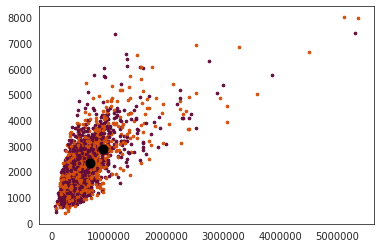

In [ ]:
k = 2 #menentukan nilai k atau menentukan 2 jumlah kluster



n = dataset.shape[0] #n sebagai dataset yang dibaca berapa banyak row

c = dataset.shape[1] #c sebgai dataset yang dibaca berapa banyak kolom


mean = np.mean(dataset, axis = 0) #membuat suatu wadah variabel mean untuk menghitung rata rata yang nantinya akan digunakan untuk update centroid
std = np.std(dataset, axis = 0) #membuat wadah standar deviasi  yang nantinya akan digunakan untuk update centroid
centers = np.random.randn(k,c)*std + mean #digunakan untuk update centroid yaitu dengan dilakukannya (random normalisasi banyaknya kluster dan kolom apa yng dipilih  dikali dengan standar deviasasi) di tambah rata rata

for i in range(n): #dilakukannya pengulangan semua row
    plt.scatter(dataset[i, 0], dataset[i,3], s=7) #membuat plot yang akan ditampilkan terhadap persebaran kolom  0 (price) dan 3 (sqft_living) dengan ukuran plot sebesar 7
plt.scatter(centers[:,0], centers[:,3], marker='o', c='black', s=80) #membuat plot centroid letaknya ada dimana terhadap persebaran data 0 (price) dan 3 (sqft_living) dengan tanda lingkaran dan warna lingkarangan hijau dengan ukuran sebesar 80

Koding Baris 9

In [ ]:
centers

array([[ 6.76301569e+05,  4.12802442e+00,  2.31250588e+00,
         2.34680356e+03,  1.65098380e+00,  2.07312742e-01,
        -6.07607844e-01,  9.09097657e+00,  2.85874745e+03,
         3.33097211e+02,  2.03118435e+03],
       [ 9.04883949e+05,  2.56015940e+00,  1.47310178e+00,
         2.85500179e+03,  1.25872384e+00, -1.12329958e-01,
         4.55256768e-01,  7.65439113e+00,  8.83661126e+02,
        -5.12131584e+02,  1.48061380e+03]])

Koding Baris 10

In [ ]:
import copy

centers_old = np.zeros(centers.shape) #centroid lama 
centers_new = copy.deepcopy(centers) #centroid baru
dataset.shape
clusters = np.zeros(n) #inisiasi cluster
distances = np.zeros((n,k)) #inisiasi jarak atau kedekatan

error = np.linalg.norm(centers_new - centers_old) #wadah untuk update centroid dengan rumus centroid yang baru dikurangi centroid lam


while error != 0:  #dilakukakannya pengulangan ketika centroid tidak mendekati 0 dia lanjut,ketika sudah = 0 dia berhenti
    
    for i in range(k): #pengulangan semua iterasi terhadap kluster yang ditentukan
        distances[:,i] = np.linalg.norm(dataset - centers[i], axis=1) #dilakukaknnya perhitungan jarak yaitu dengan (dataset-centroid) dikuadradkan dengan linalg normalisasi
    
    clusters = np.argmin(distances, axis = 1) #cluster terbaru berdasarkan distance yang sudah dhitung tadi
    
    centers_old = copy.deepcopy(centers_new) #centroid lama diganti dengan centrois baru
    
    for i in range(k):  #dilakukannya pengulanya terhadap kluster
        centers_new[i] = np.mean(dataset[clusters == i], axis=0) #centroid baru diisi dengan ratarata dari dataset yang arraynya sudah terisi cluster
    error = np.linalg.norm(centers_new - centers_old) #untuk update centroid 
centers_new   #menghasilkan centroid baru 

array([[4.26314441e+05, 3.29018021e+00, 1.93949982e+00, 1.85428466e+03,
        1.38690695e+00, 2.57447591e-03, 1.46745127e-01, 7.34571534e+00,
        1.59039978e+03, 2.63884884e+02, 1.83165576e+03],
       [1.20056037e+06, 3.93721973e+00, 2.87668161e+00, 3.38530942e+03,
        1.72645740e+00, 5.38116592e-02, 8.38565022e-01, 9.26008969e+00,
        2.80122197e+03, 5.84087444e+02, 2.90242601e+03]])

Koding Baris 11

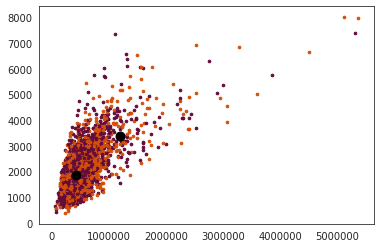

In [ ]:
for i in range(n): #dilakukannya pengulangan semua row
    plt.scatter(dataset[i, 0], dataset[i,3], s=7) #membuat plot centroid baru yang akan ditampilkan terhadap persebaran kolom  0 (price) dan kolom 3 (sqft_living) dengan ukuran plot sebesar 7
plt.scatter(centers_new[:,0], centers_new[:,3], marker='o', c='black', s=80) 

Koding Baris 12

In [ ]:
clusters #menampilan hasil cluster yang masih dalam bentuk array

array([0, 0, 0, ..., 0, 0, 0])

Koding Baris 13

In [ ]:
hasil = pd.DataFrame(clusters, columns= ['clusters']) #hasil cluster yang tadinya masih dalam bentuk array diubah kedalam dataframe atau dalam bentuk tabel cluster array tadi disi ke kollom cluster dataframe dan diisi ke variabel hasil

Koding Baris 14

In [ ]:
hasil #menampilkan variabel hasil atau  cluster yang sudah dalam bentuk tabel 

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3160,0
3161,0
3162,0
3163,0


Koding Baris 15

In [ ]:
from google.colab import files #library untuk export dari googlecolab

hasil.to_csv('hasil_cluster.csv')  #variabel hasil tadi di export ke dalam format csv dan file dinamakan dfnew4.csv
files.download('hasil_cluster.csv') #libary files digunakan untuk mendownload csv hasil

Koding Baris 16

In [ ]:
dataset = pd.DataFrame(dataset, columns= ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'floors',	'waterfront',	'view',	'grade',	'sqft_above',	'sqft_basement',	'sqft_living15'])

#dataset tadi yang diubah ke dalam bentuk array diubah lagi kedalam bentuk dataframe atrau tabel

Koding Baris 17

In [ ]:
dataset #menampilkan dataset yang sudah diubah kebentuk tabel

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
0,221900.0,3.0,1.00,1180.0,1.0,0.0,0.0,7.0,1180.0,0.0,1340.0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,0.0,7.0,2170.0,400.0,1690.0
2,180000.0,2.0,1.00,770.0,1.0,0.0,0.0,6.0,770.0,0.0,2720.0
3,604000.0,4.0,3.00,1960.0,1.0,0.0,0.0,7.0,1050.0,910.0,1360.0
4,510000.0,3.0,2.00,1680.0,1.0,0.0,0.0,8.0,1680.0,0.0,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,1.0,0.0,1.0,8.0,1340.0,500.0,1970.0
3161,780000.0,3.0,1.50,1620.0,1.0,0.0,2.0,8.0,1620.0,0.0,2440.0
3162,720000.0,2.0,1.50,1840.0,1.0,0.0,2.0,8.0,1340.0,500.0,1880.0
3163,415000.0,3.0,1.00,1360.0,1.0,0.0,0.0,7.0,1360.0,0.0,2040.0


Koding Baris 18

In [ ]:
dataset['clusters'] = clusters #dataset tadi disisipkan kolom clusters yang disi dengan cluster yang tadi sudah terbentuk yaitu 0 dan 1

Koding Baris 19

In [ ]:
dataset #menampilkan dataset yang sudah ada kolom cluster 

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,clusters
0,221900.0,3.0,1.00,1180.0,1.0,0.0,0.0,7.0,1180.0,0.0,1340.0,0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,0.0,7.0,2170.0,400.0,1690.0,0
2,180000.0,2.0,1.00,770.0,1.0,0.0,0.0,6.0,770.0,0.0,2720.0,0
3,604000.0,4.0,3.00,1960.0,1.0,0.0,0.0,7.0,1050.0,910.0,1360.0,0
4,510000.0,3.0,2.00,1680.0,1.0,0.0,0.0,8.0,1680.0,0.0,1800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,1.0,0.0,1.0,8.0,1340.0,500.0,1970.0,0
3161,780000.0,3.0,1.50,1620.0,1.0,0.0,2.0,8.0,1620.0,0.0,2440.0,0
3162,720000.0,2.0,1.50,1840.0,1.0,0.0,2.0,8.0,1340.0,500.0,1880.0,0
3163,415000.0,3.0,1.00,1360.0,1.0,0.0,0.0,7.0,1360.0,0.0,2040.0,0


Koding Baris 20

In [ ]:
dfNew1 = dataset.loc[dataset['clusters'] == 0] #dataset tadi dilakukan query yang clusternya bernilai 0 dan disi ke variabel dfNew1

Koding Baris 21

In [ ]:
dfNew1 #menampilkan variabel dfNew1 yang sudah ter-query clusters 0 saja yang ditampilkan

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,clusters
0,221900.0,3.0,1.00,1180.0,1.0,0.0,0.0,7.0,1180.0,0.0,1340.0,0
1,538000.0,3.0,2.25,2570.0,2.0,0.0,0.0,7.0,2170.0,400.0,1690.0,0
2,180000.0,2.0,1.00,770.0,1.0,0.0,0.0,6.0,770.0,0.0,2720.0,0
3,604000.0,4.0,3.00,1960.0,1.0,0.0,0.0,7.0,1050.0,910.0,1360.0,0
4,510000.0,3.0,2.00,1680.0,1.0,0.0,0.0,8.0,1680.0,0.0,1800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3160,485000.0,3.0,2.50,1840.0,1.0,0.0,1.0,8.0,1340.0,500.0,1970.0,0
3161,780000.0,3.0,1.50,1620.0,1.0,0.0,2.0,8.0,1620.0,0.0,2440.0,0
3162,720000.0,2.0,1.50,1840.0,1.0,0.0,2.0,8.0,1340.0,500.0,1880.0,0
3163,415000.0,3.0,1.00,1360.0,1.0,0.0,0.0,7.0,1360.0,0.0,2040.0,0


In [ ]:
dfNew1.describe() #melihat stasistik cluster 0

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,clusters
count,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.000000,2719.0
mean,426314.440603,3.290180,1.939500,1854.284663,1.386907,0.002574,0.146745,7.345715,1590.399779,263.884884,1831.655756,0.0
std,160269.863939,0.869322,0.669365,670.578272,0.495741,0.050683,0.578130,0.903152,615.283547,399.305018,528.286420,0.0
min,75000.000000,0.000000,0.000000,380.000000,1.000000,0.000000,0.000000,3.000000,380.000000,0.000000,620.000000,0.0
25%,297000.000000,3.000000,1.500000,1350.000000,1.000000,0.000000,0.000000,7.000000,1140.000000,0.000000,1440.000000,0.0
50%,405000.000000,3.000000,2.000000,1770.000000,1.000000,0.000000,0.000000,7.000000,1440.000000,0.000000,1750.000000,0.0
75%,543057.500000,4.000000,2.500000,2260.000000,2.000000,0.000000,0.000000,8.000000,1925.000000,515.000000,2170.000000,0.0
max,790000.000000,8.000000,5.000000,5774.000000,3.000000,1.000000,4.000000,11.000000,5450.000000,2110.000000,3920.000000,0.0


Koding Baris 22

In [ ]:
slice1 = dfNew1[['sqft_living', 'grade', 'sqft_above', 'price','clusters']] #query memilih kolom yang berpengaruh terhadap harga rumah. yang dipilih yaitu kolom sqft_living, sqft_basement, sqft_above, price, clusters pada clusters 0

Koding Baris 23

In [ ]:
slice1 #menampilkan kolom yang berpengaruh tadi tetapi masih dengan nilai clusters 0

,sqft_living,grade,sqft_above,price,clusters
0,1180.0,7.0,1180.0,221900.0,0
1,2570.0,7.0,2170.0,538000.0,0
2,770.0,6.0,770.0,180000.0,0
3,1960.0,7.0,1050.0,604000.0,0
4,1680.0,8.0,1680.0,510000.0,0
...,...,...,...,...,...
3160,1840.0,8.0,1340.0,485000.0,0
3161,1620.0,8.0,1620.0,780000.0,0
3162,1840.0,8.0,1340.0,720000.0,0
3163,1360.0,7.0,1360.0,415000.0,0


Koding Baris 24

In [ ]:
slice1.shape #menampilkan kolom berpengaruh ada 840 baris dan 5 kolom 

(2719, 5)

Koding Baris 25

In [ ]:
from google.colab import files #import library download file
slice1.to_csv('clusters0.csv') #variabel sliceq di export ke dalam csv dengan nama clusters0.csv
files.download('clusters0.csv') #library files digunakan dan mendownload nama file clusters0.csv 

Koding Baris 26

In [ ]:
dfNew2 = dataset.loc[dataset['clusters'] == 1] #inisiasi variabel dfNew 2 dengan memilih row data yang mempunyai clusters = 1

Koding Baris 27

In [ ]:
dfNew2 #menampilkan kolom yang berpengaruh tadi tetapi masih dengan nilai cluster 1


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,clusters
5,1225000.0,4.0,4.50,5420.0,1.0,0.0,0.0,11.0,3890.0,1530.0,4760.0,1
21,2000000.0,3.0,2.75,3050.0,1.0,0.0,4.0,9.0,2330.0,720.0,4110.0,1
26,937000.0,3.0,1.75,2450.0,2.0,0.0,0.0,8.0,1750.0,700.0,1760.0,1
42,861990.0,5.0,2.75,3595.0,2.0,0.0,0.0,9.0,3595.0,0.0,3625.0,1
49,1350000.0,3.0,2.50,2753.0,1.0,1.0,2.0,9.0,2165.0,588.0,2680.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3129,1265000.0,4.0,2.25,2870.0,1.0,0.0,0.0,8.0,1730.0,1140.0,2370.0,1
3133,990000.0,3.0,3.25,2460.0,2.0,0.0,0.0,8.0,2100.0,360.0,2370.0,1
3153,1506000.0,4.0,3.25,3660.0,2.5,0.0,0.0,10.0,3360.0,300.0,3240.0,1
3156,830000.0,4.0,3.00,2020.0,1.0,0.0,0.0,8.0,1220.0,800.0,1400.0,1


In [ ]:
dfNew2.describe() #menampilkan statistik cluster 1

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,clusters
count,4.460000e+02,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.0
mean,1.200560e+06,3.937220,2.876682,3385.309417,1.726457,0.053812,0.838565,9.260090,2801.221973,584.087444,2902.426009,1.0
std,5.985167e+05,0.850964,0.839298,1120.083588,0.482568,0.225899,1.352797,1.237821,1076.394461,660.608908,809.702718,0.0
min,7.915000e+05,0.000000,0.000000,1080.000000,1.000000,0.000000,0.000000,5.000000,770.000000,0.000000,1050.000000,1.0
25%,8.652648e+05,3.000000,2.500000,2665.000000,1.000000,0.000000,0.000000,8.000000,1955.000000,0.000000,2352.500000,1.0
50%,9.855000e+05,4.000000,2.750000,3190.000000,2.000000,0.000000,0.000000,9.000000,2610.000000,360.000000,2910.000000,1.0
75%,1.286750e+06,4.000000,3.500000,3930.000000,2.000000,0.000000,2.000000,10.000000,3415.000000,1040.000000,3420.000000,1.0
max,5.350000e+06,7.000000,6.000000,8010.000000,3.500000,1.000000,4.000000,12.000000,6720.000000,2620.000000,5790.000000,1.0


Koding Baris 28

In [ ]:
slice2 = dfNew2[['sqft_living', 'grade', 'sqft_above', 'price','clusters']] #query memilih kolom yang berpengaruh terhadap harga rumah. yang dipilih yaitu kolom sqft_living, sqft_basement, sqft_above, price, clusters pada clusters 1

Koding Baris 29

In [ ]:
slice2 #menampilkan kolom yang berpengaruh tadi tetapi masih dengan nilai cluster 1

,sqft_living,grade,sqft_above,price,clusters
5,5420.0,11.0,3890.0,1225000.0,1
21,3050.0,9.0,2330.0,2000000.0,1
26,2450.0,8.0,1750.0,937000.0,1
42,3595.0,9.0,3595.0,861990.0,1
49,2753.0,9.0,2165.0,1350000.0,1
...,...,...,...,...,...
3129,2870.0,8.0,1730.0,1265000.0,1
3133,2460.0,8.0,2100.0,990000.0,1
3153,3660.0,10.0,3360.0,1506000.0,1
3156,2020.0,8.0,1220.0,830000.0,1


Koding Baris 30

In [ ]:
slice2.shape #menampilkan kolom berpengaruh ada 2325 baris dan 5 kolom 

(446, 5)

Koding Baris 31

In [ ]:
from google.colab import files #library untuk export dari googlecolab
slice2.to_csv('clusters1.csv') #variabel sliceq di export ke dalam csv dengan nama cluster1.csv
files.download('clusters1.csv') #library files digunakan dan mendownload nama file clusters1.csv

Koding Baris 32

In [ ]:
#korelasi data terbaru setelah dicluster

korelasi = dataset.corr()
korelasi.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,clusters
price,1,0.292687,0.52541,0.705045,0.266345,0.366539,0.443547,0.654117,0.59906,0.348385,0.607971,0.70746
bedrooms,0.292687,1,0.524129,0.563356,0.219842,-0.0172806,0.0710377,0.377168,0.464938,0.302777,0.396506,0.251467
bathrooms,0.52541,0.524129,1,0.760447,0.483868,0.0982748,0.19274,0.671816,0.682315,0.311458,0.61096,0.424468
sqft_living,0.705045,0.563356,0.760447,1,0.388018,0.142087,0.304258,0.774177,0.866858,0.463595,0.775554,0.579043
floors,0.266345,0.219842,0.483868,0.388018,1,0.0475377,0.0292173,0.453994,0.574209,-0.242835,0.333522,0.232704
waterfront,0.366539,-0.0172806,0.0982748,0.142087,0.0475377,1,0.444111,0.0960824,0.11446,0.0813484,0.0999606,0.18102
view,0.443547,0.0710377,0.19274,0.304258,0.0292173,0.444111,1,0.232274,0.168941,0.309547,0.284924,0.310165
grade,0.654117,0.377168,0.671816,0.774177,0.453994,0.0960824,0.232274,1,0.76665,0.189093,0.75605,0.571247
sqft_above,0.59906,0.464938,0.682315,0.866858,0.574209,0.11446,0.168941,0.76665,1,-0.0398731,0.752466,0.516425
sqft_basement,0.348385,0.302777,0.311458,0.463595,-0.242835,0.0813484,0.309547,0.189093,-0.0398731,1,0.21706,0.242714


Koding 33

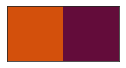

In [ ]:
#plotting clusters terhadap fitur dengan 2 dimensi

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=10)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#D3500C', '#630C3A']
sns.set_palette(customPalette)
sns.palplot(customPalette)

Koding Baris 34

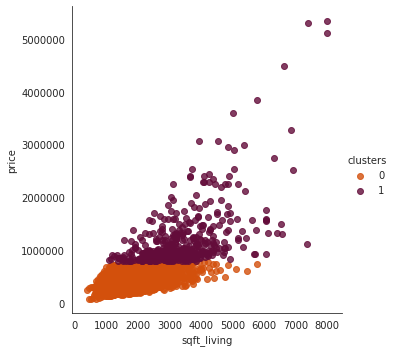

In [ ]:
#plotting clusters terhadap fitur dengan 2 dimensi

facet = sns.lmplot(data=dataset, x='sqft_living', y='price', hue='clusters', 
                   fit_reg=False, legend=True, legend_out=True)

Koding Baris 35

Text(0.5, 0.92, 'K Means')

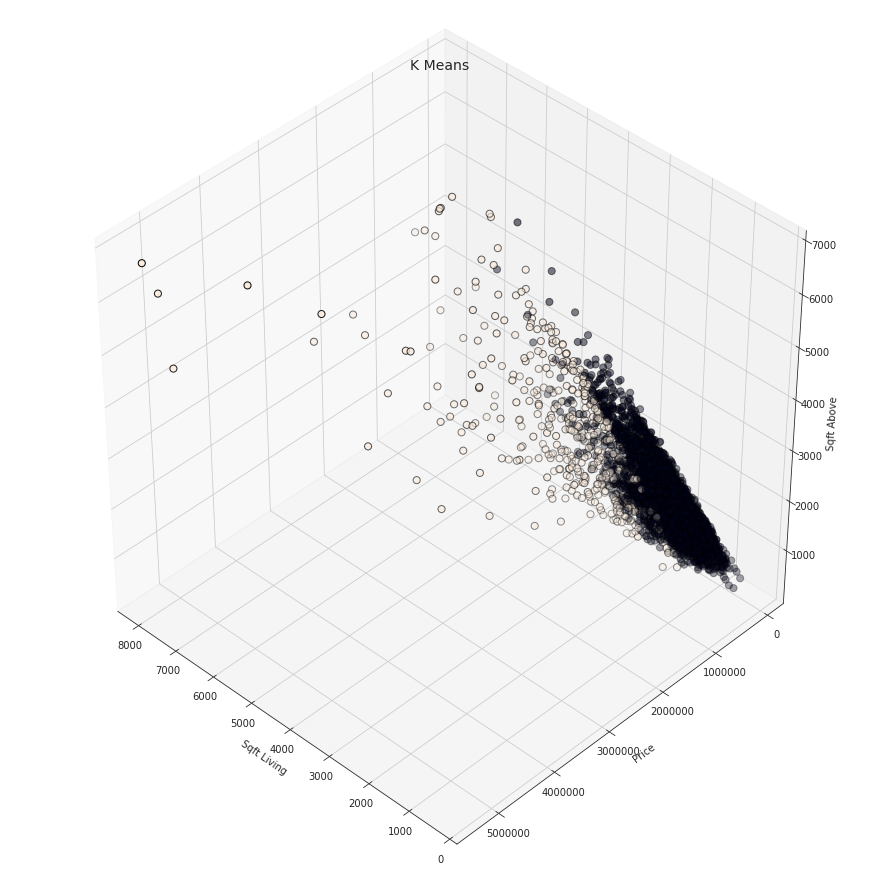

In [ ]:
#plotting clusters terhadap fitur dengan 3 dimensi

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=134)
ax.scatter(dataset['sqft_living'], dataset['price'], dataset['sqft_above'],
          c=dataset.clusters.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Sqft Living")
ax.set_ylabel("Price")
ax.set_zlabel("Sqft Above")
plt.title("K Means", fontsize=14)

Koding Baris 36

Text(0.5, 0.92, 'K Means')

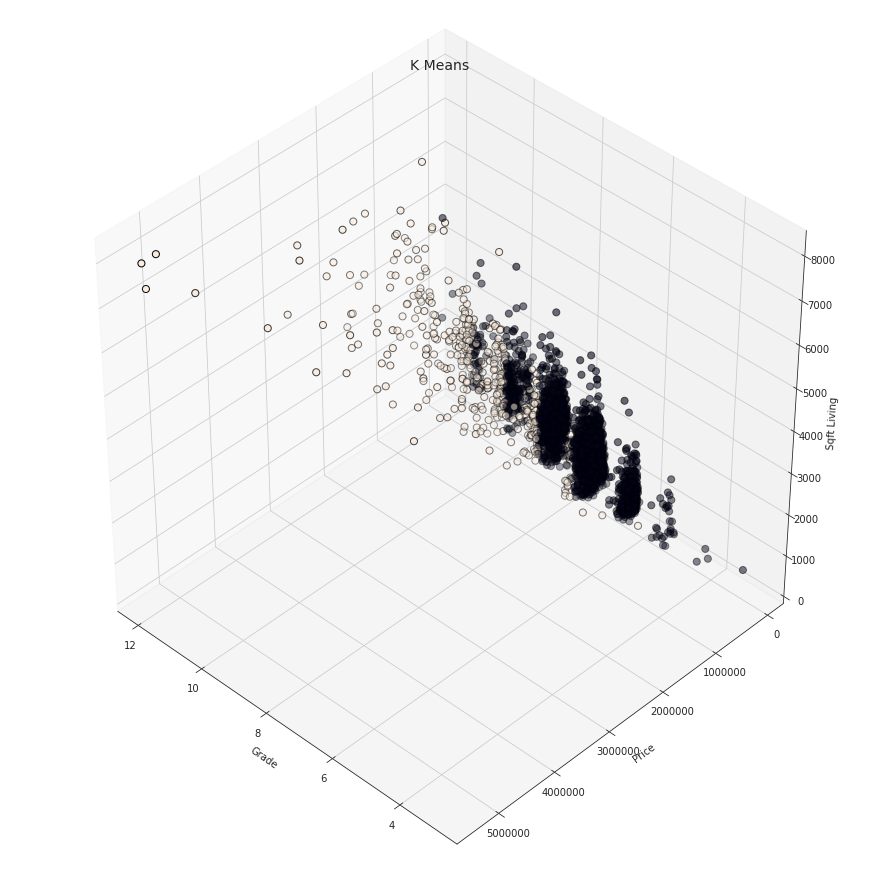

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=134)
ax.scatter(dataset['grade'], dataset['price'], dataset['sqft_living'],
          c=dataset.clusters.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Grade")
ax.set_ylabel("Price")
ax.set_zlabel("Sqft Living")
plt.title("K Means", fontsize=14)

Koding Baris 37

Text(0.5, 0.92, 'K Means')

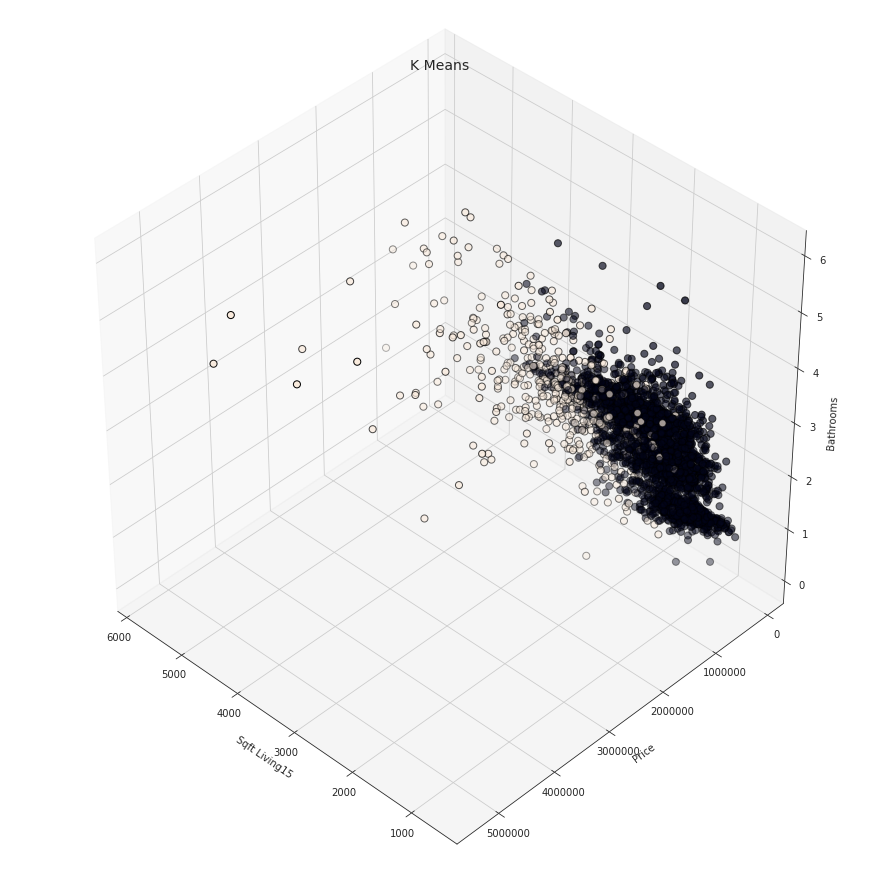

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=134)
ax.scatter(dataset['sqft_living15'], dataset['price'], dataset['bathrooms'],
          c=dataset.clusters.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Sqft Living15")
ax.set_ylabel("Price")
ax.set_zlabel("Bathrooms")
plt.title("K Means", fontsize=14)

Text(0.5, 0.92, 'K Means')

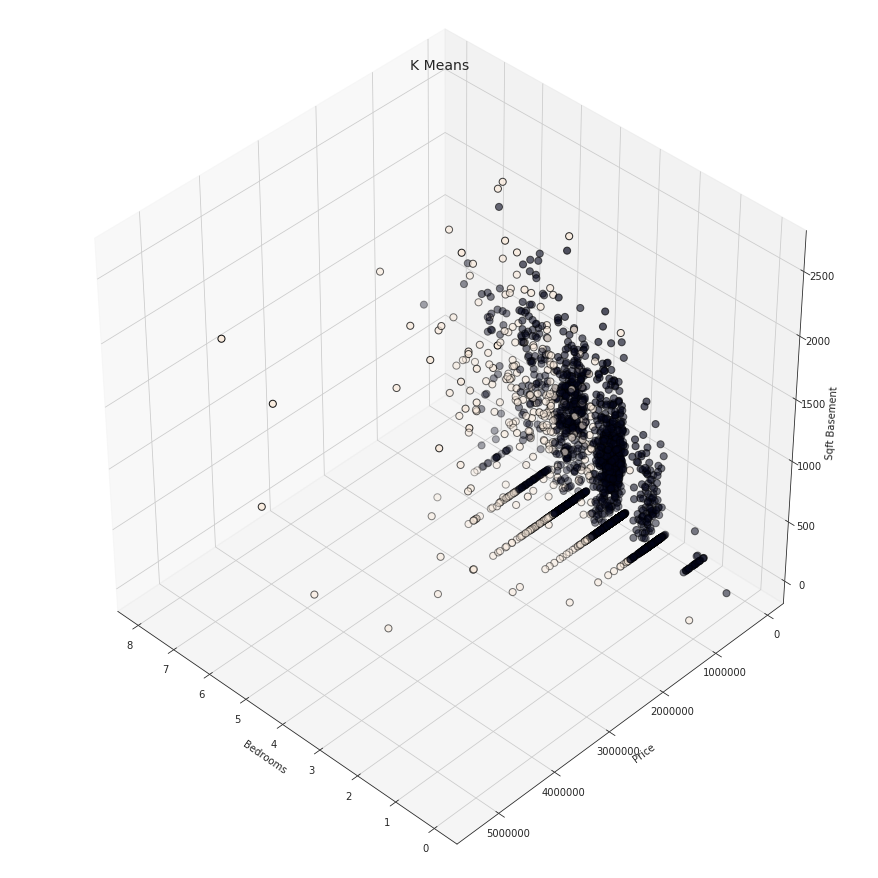

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=134)
ax.scatter(dataset['bedrooms'], dataset['price'], dataset['sqft_basement'],
          c=dataset.clusters.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Price")
ax.set_zlabel("Sqft Basement")
plt.title("K Means", fontsize=14)

Text(0.5, 0.92, 'K Means')

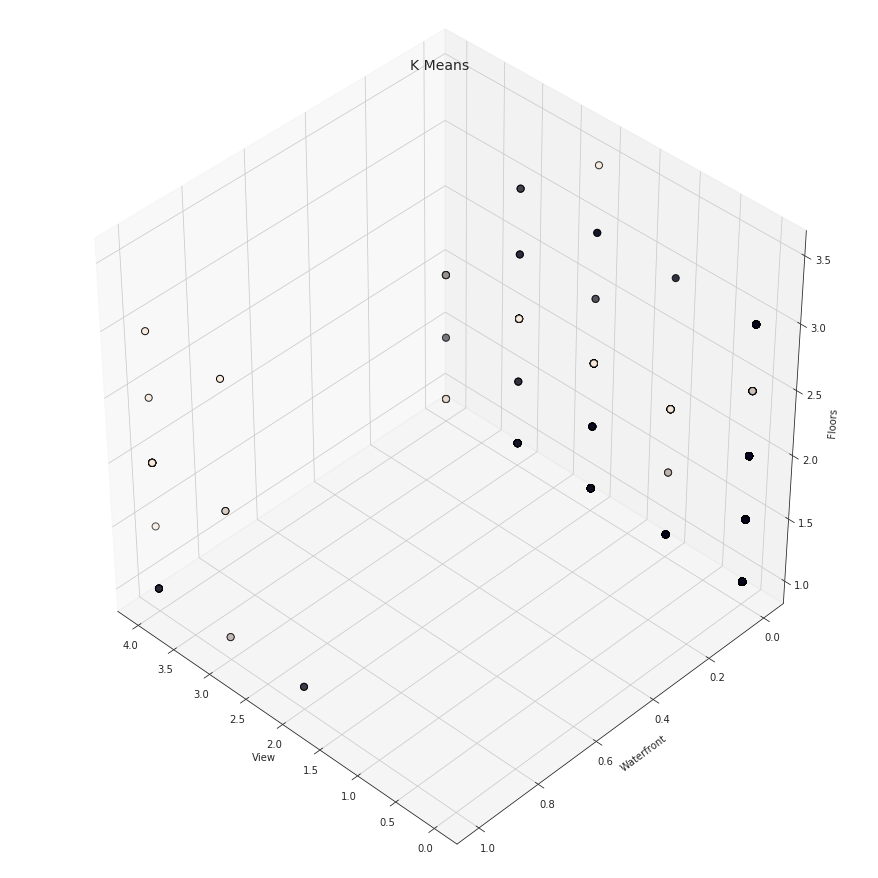

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Plotting
fig = plt.figure(1, figsize=(12,12))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=40, azim=134)
ax.scatter(dataset['view'], dataset['waterfront'], dataset['floors'],
          c=dataset.clusters.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("View")
ax.set_ylabel("Waterfront")
ax.set_zlabel("Floors")
plt.title("K Means", fontsize=14)

In [ ]:
#menghitung akurasi dengan library silhouette score

from sklearn.metrics import silhouette_score
score = silhouette_score(dataset, dataset['clusters'], metric='euclidean') #akurasi dengan metode silhouetta metrik euclidean
score

0.6814516426256096

Koding Baris 38